# Predicting fluxes from transcripts using Eflux2

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit
from tpot import TPOTRegressor
import seaborn as sns
import random
%matplotlib inline

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load input files

In [2]:
reactionNames = np.loadtxt('ishii-flux-names.csv',delimiter=',', skiprows=0,usecols=0,dtype='str')

In [3]:
# Select flux indicies for plotting
reactionDict = {'PGI':2076,'PFK':2063,'FBA':1150,'TPI':2455,'PYK':2265,'PDH':2046,'GND':1422,'RPE':2311,'RPI':2312,'TALA':2397,'ICL':1551,'MALS':1713}

In [4]:
# Ishii flux data, WT reference strain [mmol/gDW/h]: http://ecoli.iab.keio.ac.jp/ > Fluxome > Fluxome data
ishiiDict = {2076:2.247179186,2063:2.495301258,1150:2.495301258,2455:2.495301258,2265:1.399624166,2046:3.722827564,1422:.6439079794,2311:.2684455913,2312:.3754514687,2397:.1783978343,1551:.3268244693,1713:.3268244693}

In [5]:
eflux2Fluxes = np.loadtxt('ishii-flux-1.csv',delimiter=',', skiprows=0,usecols=0)

# Organize predictions and experimental data for plotting

In [6]:
exp, eflux2 = [],[]
for i in ishiiDict:
    print('Working on reaction:',reactionNames[i])
    print('   Experiment:',ishiiDict[i],'|   Eflux2 prediction:',eflux2Fluxes[i])
    exp.append(ishiiDict[i])
    eflux2.append(float(eflux2Fluxes[i]))
exp = np.array(exp)
eflux2 = np.array(eflux2)

Working on reaction: R_PGI
   Experiment: 2.247179186 |   Eflux2 prediction: 2.296128682
Working on reaction: R_PFK
   Experiment: 2.495301258 |   Eflux2 prediction: 1.790151679
Working on reaction: R_FBA
   Experiment: 2.495301258 |   Eflux2 prediction: 1.790151679
Working on reaction: R_TPI
   Experiment: 2.495301258 |   Eflux2 prediction: 3.378207362
Working on reaction: R_PYK
   Experiment: 1.399624166 |   Eflux2 prediction: 1.563415101
Working on reaction: R_PDH
   Experiment: 3.722827564 |   Eflux2 prediction: 1.100181514
Working on reaction: R_GND
   Experiment: 0.6439079794 |   Eflux2 prediction: 1.691451557
Working on reaction: R_RPE
   Experiment: 0.2684455913 |   Eflux2 prediction: 0.867799311
Working on reaction: R_RPI
   Experiment: 0.3754514687 |   Eflux2 prediction: -0.810324773
Working on reaction: R_TALA
   Experiment: 0.1783978343 |   Eflux2 prediction: -0.861606754
Working on reaction: R_ICL
   Experiment: 0.3268244693 |   Eflux2 prediction: 1.98e-11
Working on react

# Plot results

In [7]:
# Load reaction labels
labels=[i for i in reactionDict]

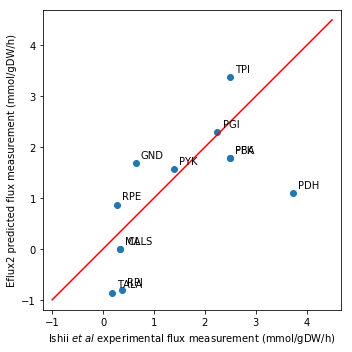

In [8]:
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(exp,eflux2,label=labels)
X_plot = np.linspace(-1, 4.5, 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='r')
plt.xlim(-1,3)
#plt.ylim([-1,5])
plt.axis('equal')
for i in range(len(exp)):
    xy = (exp[i]+.1,eflux2[i]+.1)
    plt.annotate(labels[i],xy)
plt.xlabel(r'Ishii $et$ $al$ experimental flux measurement (mmol/gDW/h)')
plt.ylabel(r'Eflux2 predicted flux measurement (mmol/gDW/h)')
plt.tight_layout()
#plt.show()
plt.savefig('eflux2-exp.pdf')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


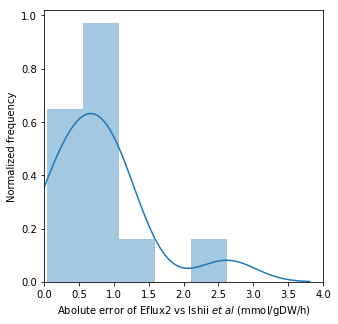

In [9]:
absError = abs(exp-eflux2)
sns.distplot(absError,hist=True)
plt.xlabel(r'Abolute error of Eflux2 vs Ishii $et$ $al$ (mmol/gDW/h)')
plt.ylabel(r'Normalized frequency')
plt.xlim(0,4)
#plt.show()
plt.savefig('eflux2-exp-error.pdf')